In [6]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [22]:
df = pd.read_csv('example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [23]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [25]:
# Python
forecast = m.predict(future)
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
3265,2017-01-15,7.189085,6.824249,7.525255,7.471446,8.925530,1.017668,1.017668,1.017668,1.017668,1.017668,1.017668,0.048286,0.048286,0.048286,0.969382,0.969382,0.969382,8.206753
3266,2017-01-16,7.188059,6.822227,7.526012,7.785753,9.281454,1.343707,1.343707,1.343707,1.343707,1.343707,1.343707,0.352298,0.352298,0.352298,0.991409,0.991409,0.991409,8.531766
3267,2017-01-17,7.187033,6.820208,7.526770,7.591298,9.040104,1.132123,1.132123,1.132123,1.132123,1.132123,1.132123,0.119631,0.119631,0.119631,1.012493,1.012493,1.012493,8.319156
3268,2017-01-18,7.186006,6.818258,7.527528,7.454330,8.800901,0.965765,0.965765,0.965765,0.965765,0.965765,0.965765,-0.066664,-0.066664,-0.066664,1.032429,1.032429,1.032429,8.151772
3269,2017-01-19,7.184980,6.816307,7.528286,7.455378,8.861621,0.978710,0.978710,0.978710,0.978710,0.978710,0.978710,-0.072264,-0.072264,-0.072264,1.050973,1.050973,1.050973,8.163690


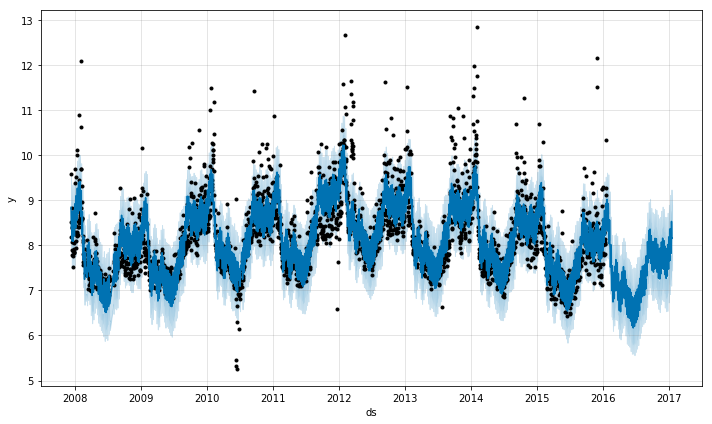

In [15]:
m.plot(forecast)

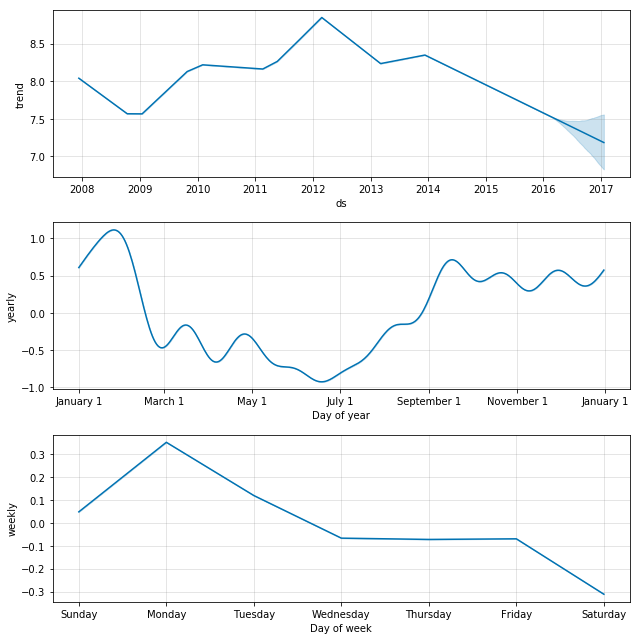

In [16]:
m.plot_components(forecast)

In [18]:
#Forecasting Growth
df = pd.read_csv('example_wp_R.csv')
df['y'] = np.log(df['y'])

In [19]:
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


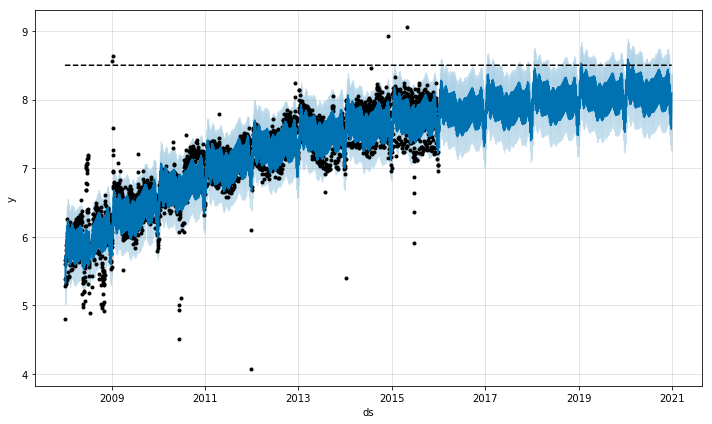

In [20]:
# 指定上限df['cap'] = 8.5
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


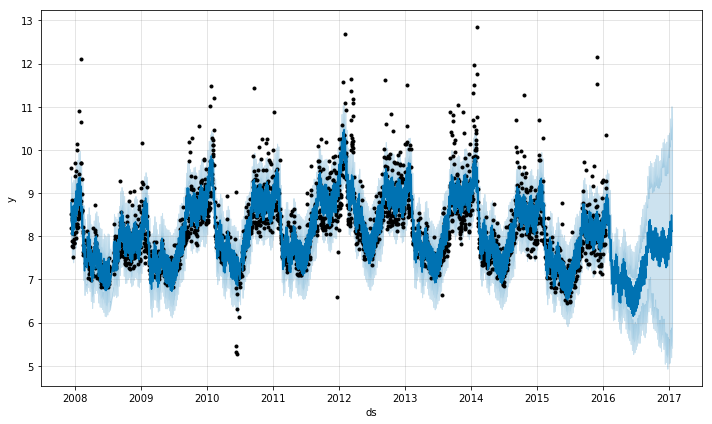

In [26]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


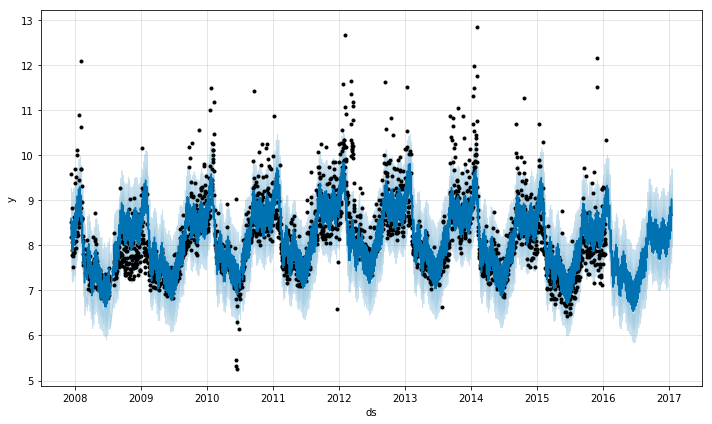

In [28]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


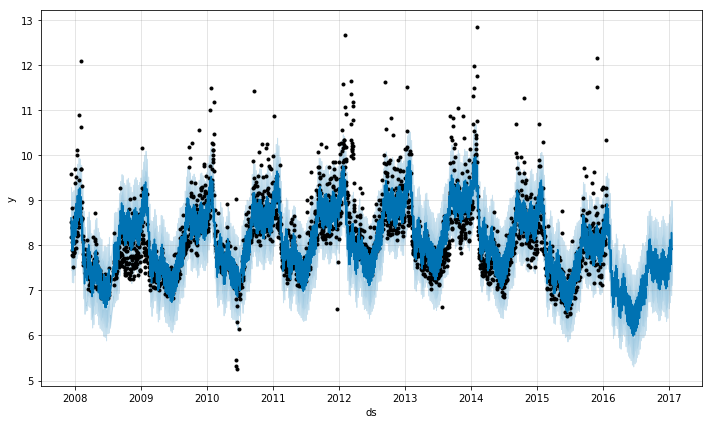

In [29]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


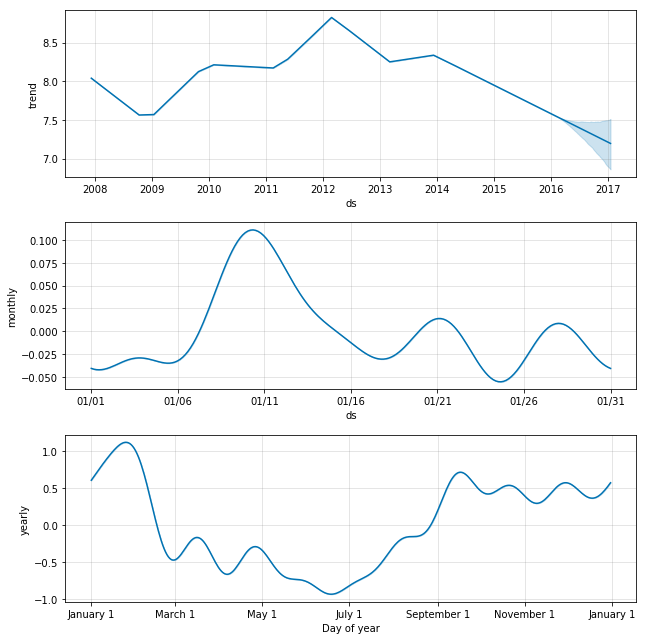

In [30]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
m.plot_components(forecast)

In [31]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [32]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.226679,1.192500
2191,2014-02-03,1.911294,1.373781
2532,2015-01-11,1.226679,0.000000
2533,2015-01-12,1.911294,0.000000
2901,2016-01-17,1.226679,0.000000
2902,2016-01-18,1.911294,0.000000
2908,2016-01-24,1.226679,0.000000
2909,2016-01-25,1.911294,0.000000
2922,2016-02-07,1.226679,1.192500
2923,2016-02-08,1.911294,1.373781


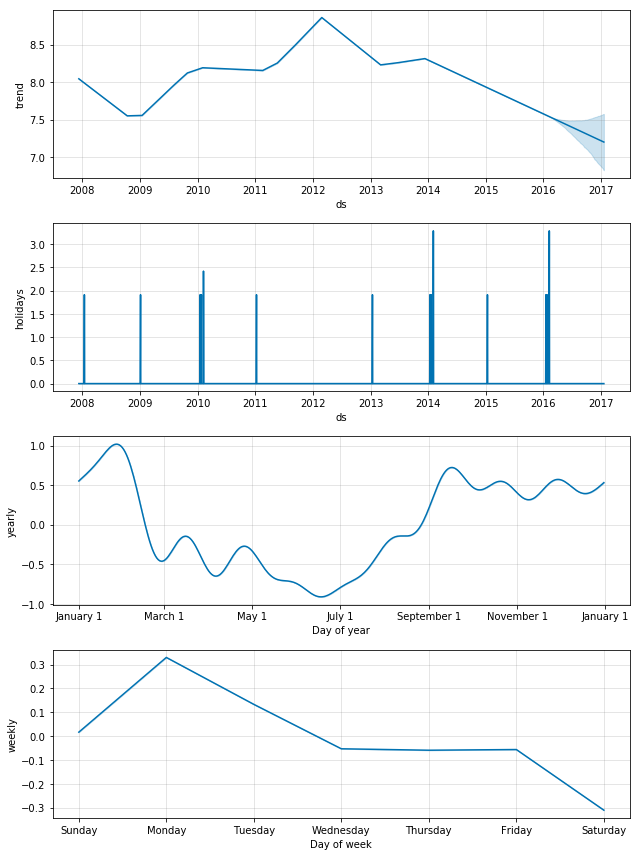

In [35]:
m.plot_components(forecast)